In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Import the three datasets

In [2]:
movies_df = pd.read_csv(
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    engine='python',
    header=None,
    dtype={'MovieID' : np.int32,'Title' : np.str,'Genres' : np.str}, encoding="latin-1"
)
users_df = pd.read_csv(
    'users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    engine='python',
    header=None
)
ratings_df = pd.read_csv(
    'ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    engine='python',
    header=None
)

In [3]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
users_df

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
df=pd.merge(movies_df,ratings_df, on='MovieID')
df

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [7]:
df=pd.merge(df,users_df, on='UserID')
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [8]:
df.isna().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
zip-code      0
dtype: int64

In [9]:
df.drop('zip-code',axis=1,inplace=True)

In [10]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


In [11]:
users_df.loc[(users_df.Age < 18),  'AgeGroup'] = 'Under 18'
users_df.loc[(users_df.Age>=18) & (users_df.Age<=24),  'AgeGroup']='18-24'
users_df.loc[(users_df.Age>=25) & (users_df.Age<=34),  'AgeGroup']='25-34'
users_df.loc[(users_df.Age>=35) & (users_df.Age<=44),  'AgeGroup']='35-44'
users_df.loc[(users_df.Age>=45) & (users_df.Age<=49),  'AgeGroup']='45-49'
users_df.loc[(users_df.Age>=50) & (users_df.Age<=55),  'AgeGroup']='50-55'
users_df.loc[(users_df.Age>=56) ,  'AgeGroup']='56+'

In [12]:
p=users_df.groupby('AgeGroup')['Age'].size()
p

AgeGroup
18-24       1103
25-34       2096
35-44       1193
45-49        550
50-55        496
56+          380
Under 18     222
Name: Age, dtype: int64

Text(0.5, 0, 'Age Groups')

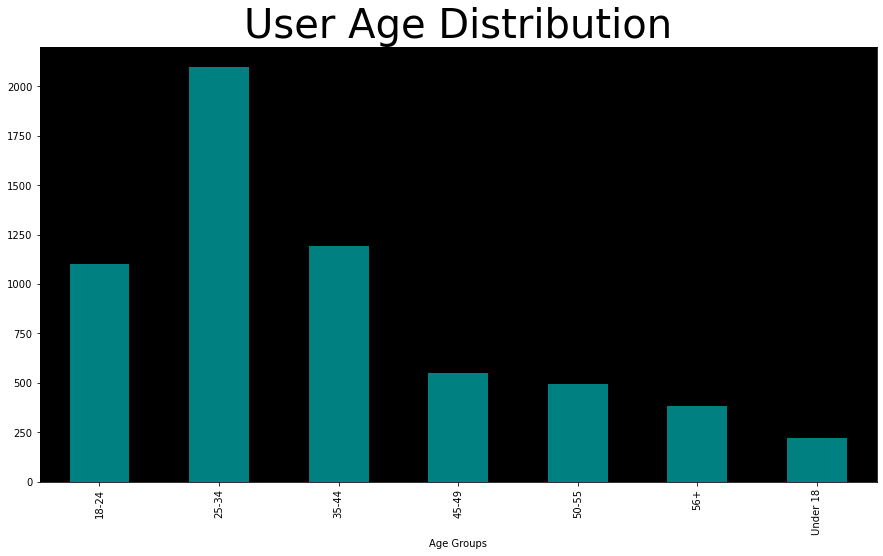

In [13]:
plt.figure(figsize=(15,8))
p.plot(kind='bar',color='teal').set_facecolor('black')
plt.title('User Age Distribution', size=40)
plt.xlabel('Age Groups')

# User rating of the movie “Toy Story”

In [14]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


In [15]:
toy=df[df['Title']=='Toy Story (1995)'].groupby('Rating').size()
toy=pd.DataFrame(toy)
toy

,0
Rating,
1,16
2,61
3,345
4,835
5,820


Text(0.5, 1.0, 'Toy Story (1995) Ratings')

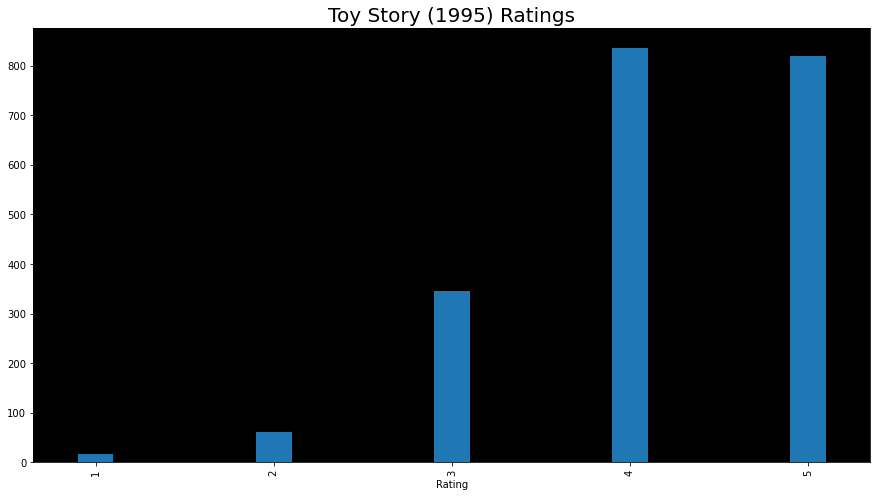

In [16]:
plt.figure(figsize=(15,8))
toy[0].plot(kind='bar',width=0.2).set_facecolor('black')
plt.title('Toy Story (1995) Ratings', size=20)

In [17]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


# Top 25 movies by viewership rating

In [18]:
s=df.groupby(['MovieID','Title'])['Rating'].mean()
s=pd.DataFrame(s)
s['Rating'].sort_values(ascending=False)

MovieID  Title                                    
989      Schlafes Bruder (Brother of Sleep) (1995)    5.0
3881     Bittersweet Motel (2000)                     5.0
1830     Follow the Bitch (1998)                      5.0
3382     Song of Freedom (1936)                       5.0
787      Gate of Heavenly Peace, The (1995)           5.0
                                                     ... 
826      Diebinnen (1995)                             1.0
3228     Wirey Spindell (1999)                        1.0
2845     White Boys (1999)                            1.0
3209     Loves of Carmen, The (1948)                  1.0
142      Shadows (Cienie) (1988)                      1.0
Name: Rating, Length: 3706, dtype: float64

In [19]:
top25=s['Rating'].nlargest(25)
top25=pd.DataFrame(top25)
top25.style.set_properties(**{'background-color': 'yellow',
                           'color': 'black'})

,,Rating
MovieID,Title,
787,"Gate of Heavenly Peace, The (1995)",5.000000
989,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1830,Follow the Bitch (1998),5.000000
3172,Ulysses (Ulisse) (1954),5.000000
3233,Smashing Time (1967),5.000000
3280,"Baby, The (1973)",5.000000
3382,Song of Freedom (1936),5.000000
3607,One Little Indian (1973),5.000000
3656,Lured (1947),5.000000


Text(0.5, 0, 'Ratings Aggregate')

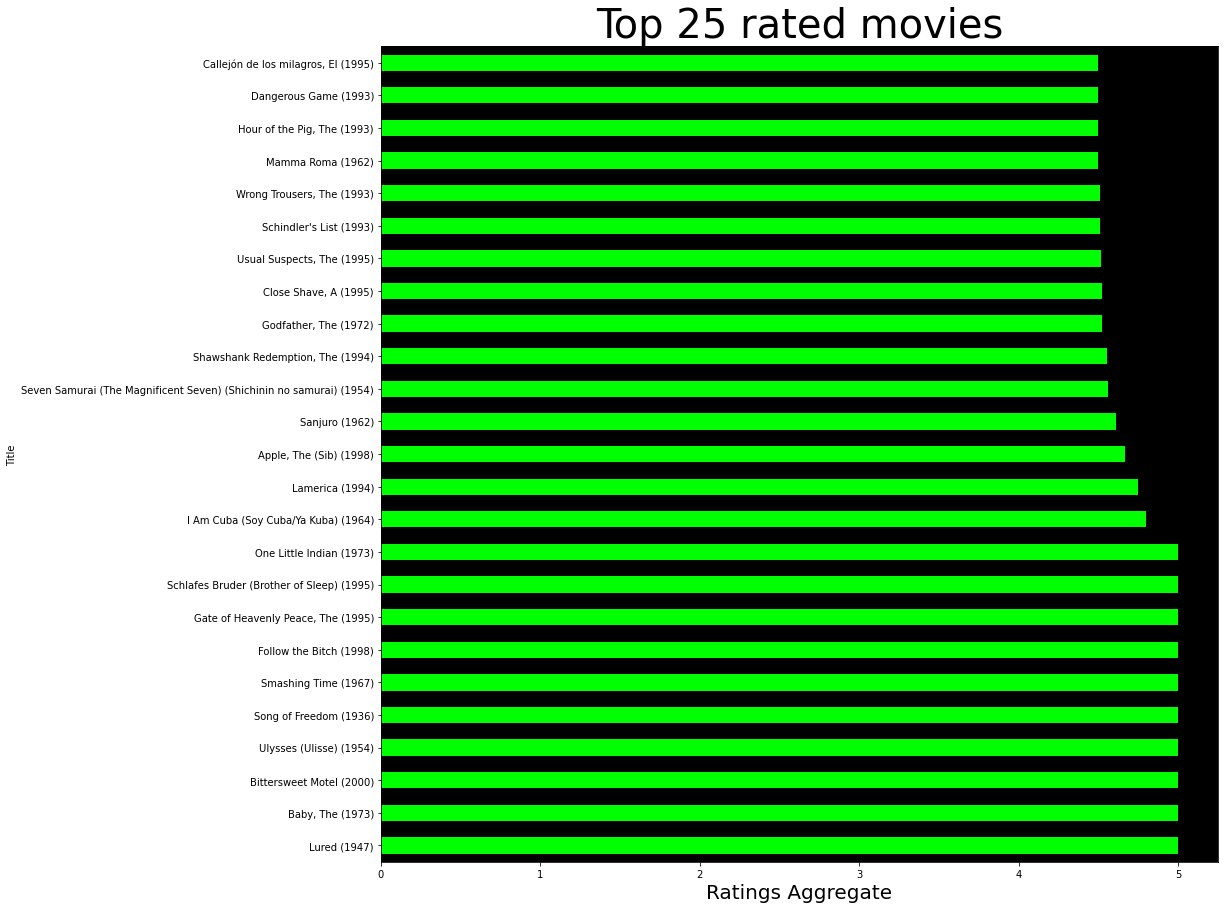

In [20]:
plt.figure(figsize=(15,15))
plt.title('Top 25 rated movies',size=40)
top25.groupby('Title')['Rating'].sum().sort_values(ascending=False).plot(kind='barh',color='lime').set_facecolor('black')
plt.xlabel('Ratings Aggregate',size=20)

# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [21]:
df[df['UserID']==2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7


In [22]:
df[df['UserID']==2696].groupby(['Title'])['Rating'].sum()

Title
Back to the Future (1985)                         2
Basic Instinct (1992)                             4
Client, The (1994)                                3
Cop Land (1997)                                   3
Devil's Advocate, The (1997)                      4
E.T. the Extra-Terrestrial (1982)                 3
Game, The (1997)                                  4
I Know What You Did Last Summer (1997)            2
I Still Know What You Did Last Summer (1998)      2
JFK (1991)                                        1
L.A. Confidential (1997)                          4
Lake Placid (1999)                                1
Lone Star (1996)                                  5
Midnight in the Garden of Good and Evil (1997)    4
Palmetto (1998)                                   4
Perfect Murder, A (1998)                          4
Psycho (1998)                                     4
Shining, The (1980)                               4
Talented Mr. Ripley, The (1999)                   4
Wild T

Text(0.5, 0, 'Ratings given by user_id=2696')

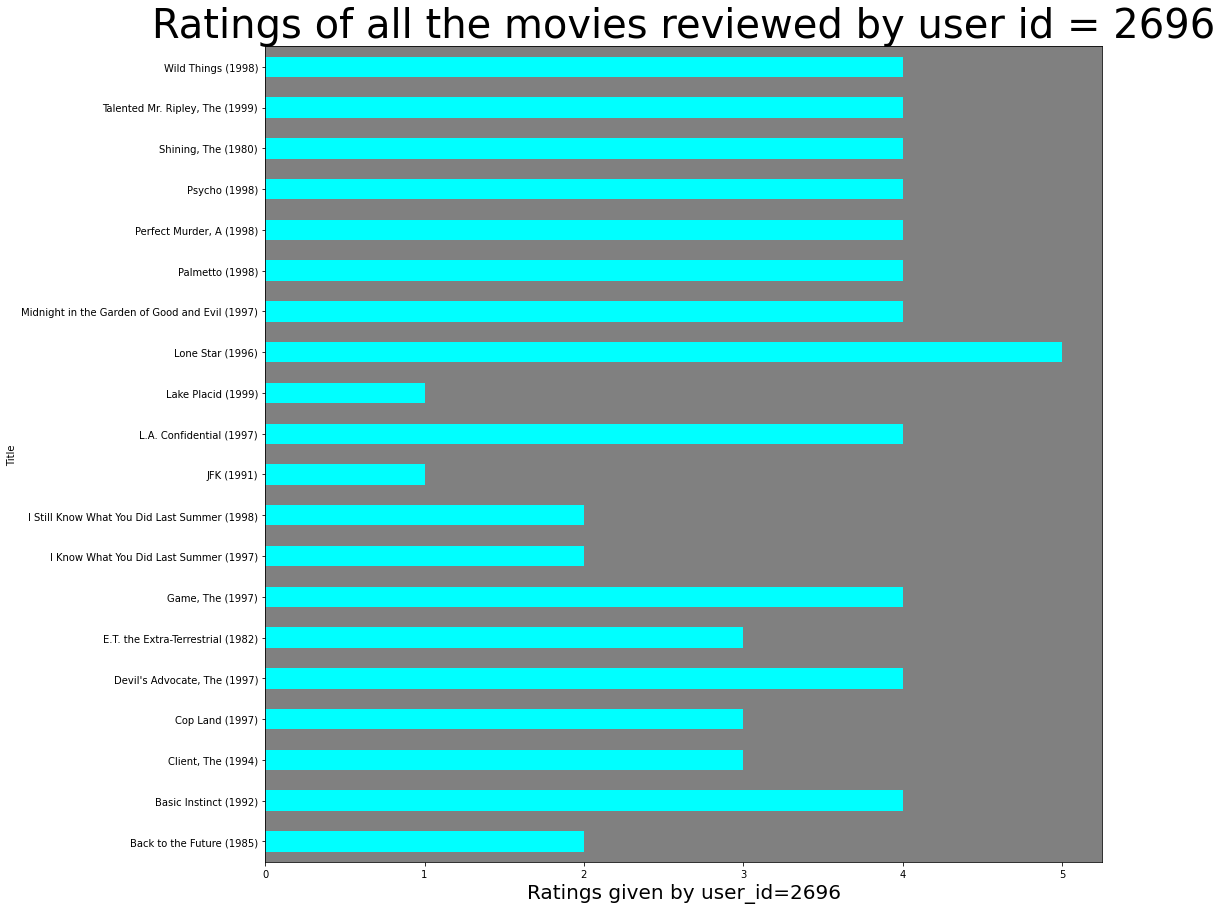

In [23]:
plt.figure(figsize=(15,15))
plt.title('Ratings of all the movies reviewed by user id = 2696', size=40)
df[df['UserID']==2696].groupby(['Title'])['Rating'].sum().plot(kind='barh',color='aqua').set_facecolor('grey')
plt.xlabel('Ratings given by user_id=2696',size=20)

# Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [24]:
df['Genres'].unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [25]:
genres=df['Genres'].str.split('|')
genres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [26]:
unique_genres=set()

for gen in genres:
    unique_genres=unique_genres.union(set(gen))

In [27]:
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [28]:
uq=pd.DataFrame(unique_genres)
uq.columns

RangeIndex(start=0, stop=1, step=1)

In [29]:
uq.columns = ['Genre']
uq.style.set_properties(**{'background-color': 'yellow',
                           'color': 'black'})

,Genre
0,Romance
1,Adventure
2,Thriller
3,War
4,Horror
5,Documentary
6,Film-Noir
7,Children's
8,Drama
9,Sci-Fi


# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [30]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


In [31]:
oneHotGenre = df["Genres"].str.get_dummies("|")
oneHotGenre

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
oneHotGenre = pd.concat([df,oneHotGenre],axis=1)
oneHotGenre.head()


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


In [34]:
oneHotGenre = pd.concat([df,oneHotGenre],axis=1)
oneHotGenre.head()


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,MovieID,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,150,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,260,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,527,...,0,0,0,0,0,0,0,0,1,0


# Determine the features affecting the ratings of any particular movie.

In [35]:
feature_df=df.copy()
feature_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4


In [36]:
feature_df[["Title","Year"]]=df['Title'].str.extract('(.*)\((\d{4})\)', expand=False)

In [37]:
feature_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Year
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,1995
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,1995
2,150,Apollo 13,Drama,1,5,978301777,F,1,10,1995
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,1977
4,527,Schindler's List,Drama|War,1,5,978824195,F,1,10,1993
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,Drama|Thriller,5727,4,958489970,M,25,4,2000
1000205,3535,American Psycho,Comedy|Horror|Thriller,5727,2,958489970,M,25,4,2000
1000206,3536,Keeping the Faith,Comedy|Romance,5727,5,958489902,M,25,4,2000
1000207,3555,U-571,Action|Thriller,5727,3,958490699,M,25,4,2000


In [38]:
df['Year']=df['Title'].str.findall('\((\d{4})\)').str.get(0)

In [39]:
feature_df['Year'] = feature_df.Year.astype(int)

In [40]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int32 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Year        1000209 non-null  int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 61.0+ MB


In [41]:
feature_df['Movie Age']=2000-feature_df['Year']
feature_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Year,Movie Age
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,1995,5
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,1995,5
2,150,Apollo 13,Drama,1,5,978301777,F,1,10,1995,5
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,1977,23
4,527,Schindler's List,Drama|War,1,5,978824195,F,1,10,1993,7
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,Drama|Thriller,5727,4,958489970,M,25,4,2000,0
1000205,3535,American Psycho,Comedy|Horror|Thriller,5727,2,958489970,M,25,4,2000,0
1000206,3536,Keeping the Faith,Comedy|Romance,5727,5,958489902,M,25,4,2000,0
1000207,3555,U-571,Action|Thriller,5727,3,958490699,M,25,4,2000,0


In [42]:
feature_df['Gender']=feature_df.Gender.replace('F',1)
feature_df['Gender']=feature_df.Gender.replace('M',0)
feature_df['Gender']=feature_df.Gender.astype(int)
feature_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Year,Movie Age
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,1,1,10,1995,5
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,1995,5
2,150,Apollo 13,Drama,1,5,978301777,1,1,10,1995,5
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,1977,23
4,527,Schindler's List,Drama|War,1,5,978824195,1,1,10,1993,7
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,Drama|Thriller,5727,4,958489970,0,25,4,2000,0
1000205,3535,American Psycho,Comedy|Horror|Thriller,5727,2,958489970,0,25,4,2000,0
1000206,3536,Keeping the Faith,Comedy|Romance,5727,5,958489902,0,25,4,2000,0
1000207,3555,U-571,Action|Thriller,5727,3,958490699,0,25,4,2000,0


In [43]:
correlation=feature_df[['Gender','Age','Movie Age','Occupation']].corrwith(feature_df['Rating'])
correlation

Gender        0.019861
Age           0.056869
Movie Age     0.156946
Occupation    0.006753
dtype: float64

Movie Age has the most positive relationship with Rating

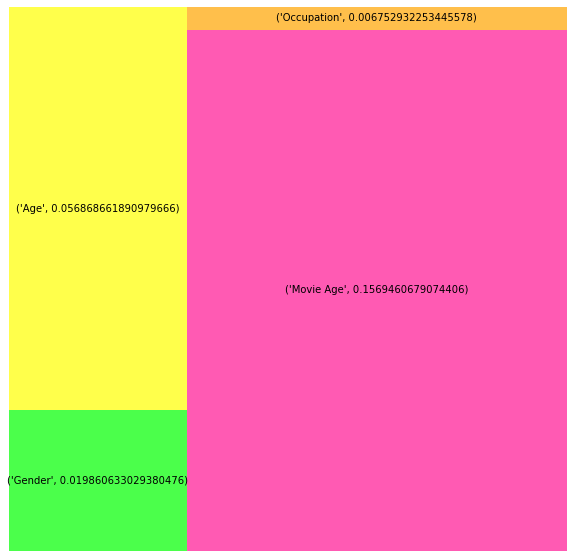

In [44]:
import squarify
fig = plt.gcf()
fig.set_size_inches(10, 10)
label=zip(list(correlation.index),correlation)
squarify.plot(sizes=correlation, label=label, alpha=0.7,color=['lime','yellow','deeppink','orange'])
plt.axis('off')
plt.show()

In [45]:
crosstab = pd.crosstab(index=feature_df["Movie Age"], columns=feature_df["Rating"])
crosstab

Rating,1,2,3,4,5
Movie Age,,,,,
0,3551,5313,11125,14300,6711
1,6386,10704,22158,28585,19000
2,4709,8525,18751,23310,12931
3,4738,8533,18563,22204,11364
4,4540,8001,16852,19827,10162
...,...,...,...,...,...
77,4,2,2,6,3
78,12,10,42,78,96
79,3,5,10,28,16


Text(0.5, 1.0, 'Frequency of different ratings according to the movie age (how much older than 2000)')

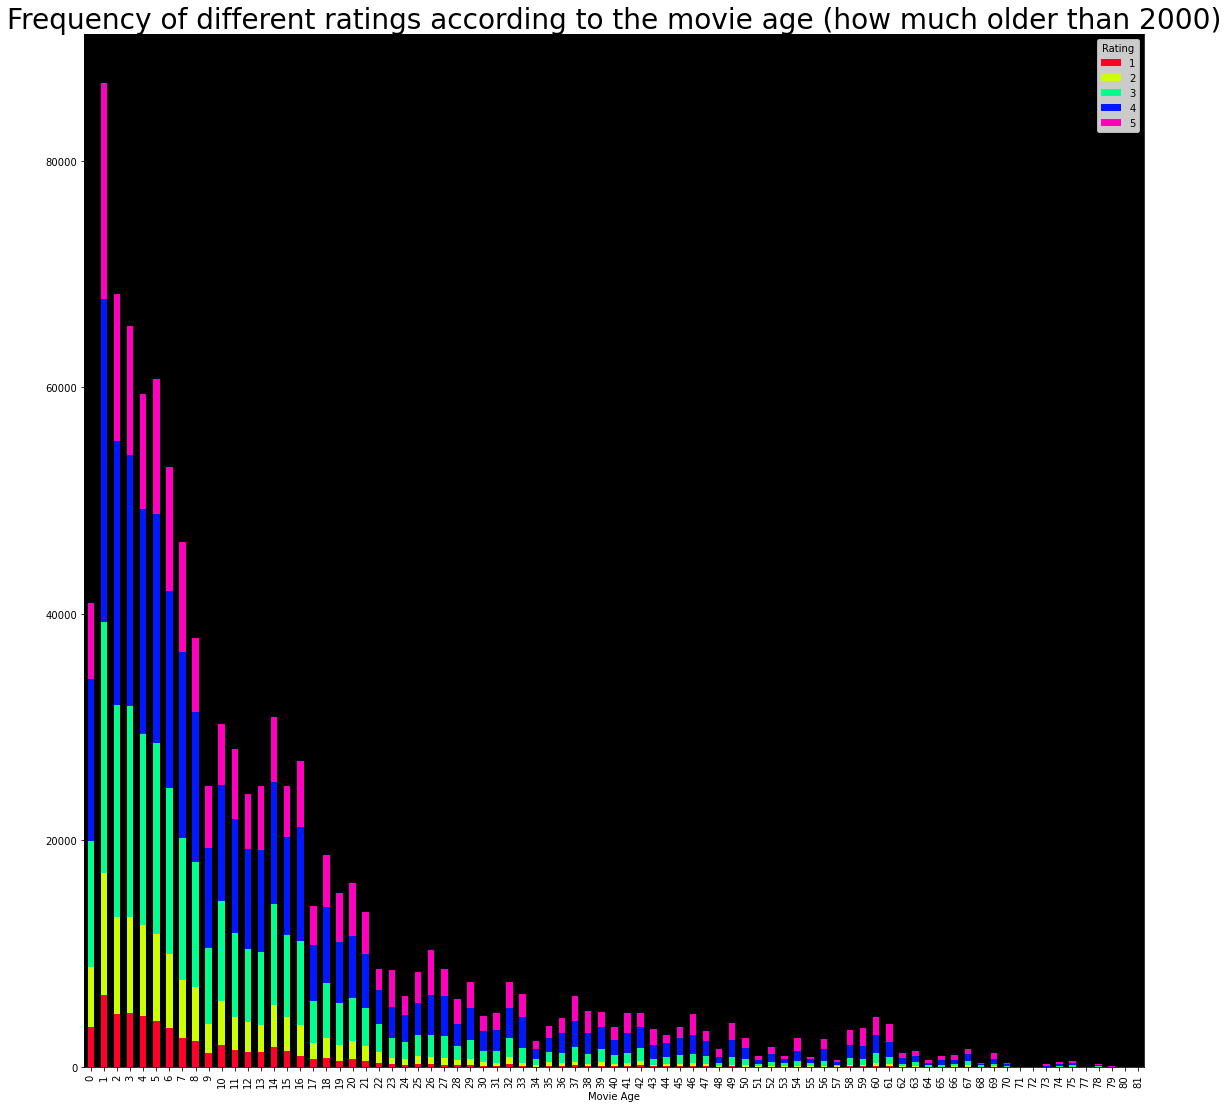

In [46]:
crosstab.plot(kind="bar", figsize=(19,19), stacked=True, colormap='gist_rainbow').set_facecolor('black')
plt.title('Frequency of different ratings according to the movie age (how much older than 2000)', size=28)

# Develop an appropriate model to predict the movie ratings

In [47]:
feature_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Year,Movie Age
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,1,1,10,1995,5
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,1995,5
2,150,Apollo 13,Drama,1,5,978301777,1,1,10,1995,5
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,1977,23
4,527,Schindler's List,Drama|War,1,5,978824195,1,1,10,1993,7
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,Drama|Thriller,5727,4,958489970,0,25,4,2000,0
1000205,3535,American Psycho,Comedy|Horror|Thriller,5727,2,958489970,0,25,4,2000,0
1000206,3536,Keeping the Faith,Comedy|Romance,5727,5,958489902,0,25,4,2000,0
1000207,3555,U-571,Action|Thriller,5727,3,958490699,0,25,4,2000,0


In [48]:
x=feature_df[['Age','Occupation','Gender','Movie Age','Year']].head(50)
y=feature_df['Rating'].head(50)
x

,Age,Occupation,Gender,Movie Age,Year
0,1,10,1,5,1995
1,1,10,1,5,1995
2,1,10,1,5,1995
3,1,10,1,23,1977
4,1,10,1,7,1993
5,1,10,1,7,1993
6,1,10,1,8,1992
7,1,10,1,63,1937
8,1,10,1,9,1991
9,1,10,1,4,1996


In [49]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,random_state=2,test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [51]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_predict=logReg.predict(x_test)
y_predict

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)


0.4666666666666667